#Salary Estimation using KNN

In [ ]:
import pandas as pd
import numpy as np

#Import files from local using google.colab

In [1]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


#Import datasets into a pandas dataframe

In [4]:
#importing dataset to df
import pandas as pd
df = pd.read_csv("salary.csv")
df.shape, df.head()

((32561, 5),    age  education.num  capital.gain  hours.per.week income
 0   90              9             0              40  <=50K
 1   82              9             0              18  <=50K
 2   66             10             0              40  <=50K
 3   54              4             0              40  <=50K
 4   41             10             0              40  <=50K)

In [5]:
#Mapping the data from object to int
df["income"] = df["income"].map({"<=50K":0, ">50K":1}).astype(int)

In [6]:
#Segregate dataset as input and output
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [7]:
x_train.shape,y_test.shape

((26048, 4), (6513,))

In [8]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.fit_transform(x_train)
tr_x_test = ss.fit_transform(x_test)

In [9]:
tr_x_train.min(), tr_x_train.max(), tr_x_test.min(), tr_x_test.max()

(-3.5236652698105786,
 13.442521473557779,
 -3.553967661108186,
 13.207806256372956)

In [10]:
#Algorithm - Calculate the Euclidean distance between points of dataset
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2, p=2, metric="minkowski")
knn.fit(tr_x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [11]:
x_test.head(), tr_x_test

(       age  education.num  capital.gain  hours.per.week
 9646    24              9             0              50
 709     34             13             0              48
 7385    18              9             0              40
 16671   44             13             0              40
 21932   27             14             0              40,
 array([[-1.06811344, -0.42128625, -0.14682362,  0.77960288],
        [-0.33230548,  1.14505446, -0.14682362,  0.61875028],
        [-1.50959823, -0.42128625, -0.14682362, -0.02466011],
        ...,
        [ 1.13931046, -0.02970107, -0.14682362, -0.02466011],
        [-0.03798229,  1.92822481, 13.20780626,  1.34258697],
        [ 0.1827601 , -0.02970107, -0.14682362, -0.02466011]]))

In [12]:
#Calculate best k-value using KNeighboreClassifier k = 1 to 40
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

error = []
for i in range(1,41):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(tr_x_train,y_train)
  y_pred = knn.predict(tr_x_test)
  mean_error = mean_absolute_error(y_pred, y_test)
  error.append(mean_error)
# np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1)

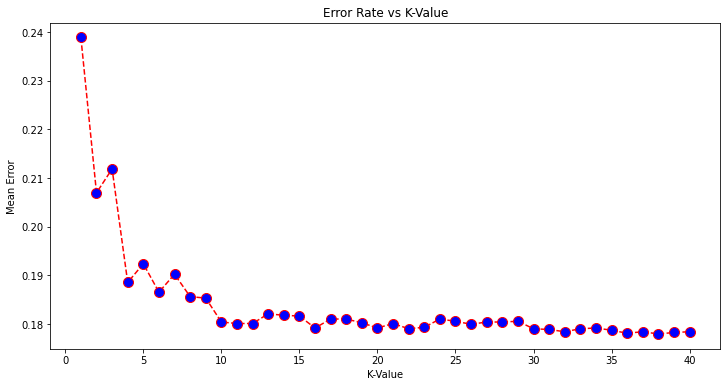

In [13]:
plt.figure(figsize=(12,6))
x = range(1,41)
y = error
plt.plot(x,y,"r--o", mfc="b",ms=10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K-Value")
plt.ylabel("Mean Error")
plt.show()

In [14]:
#Training out model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=2, metric="minkowski")
knn.fit(tr_x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
#Predicting all out test data
y_pred = knn.predict(tr_x_test)

In [17]:
#Confusion metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("Accuracy of the Model: {}".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix:
 [[4697  246]
 [ 969  601]]
Accuracy of the Model: 81.34500230308613


In [18]:
age = int(input("Enter the Age of Employee:\n"))
cap_gain = int(input("Enter Capital Gain:\n"))
cap_loss = int(input("Enter Capital Losss:\n"))
hours_per_week = int(input("Enter Hours-Per-Week:\n"))
new_employee = [[age, cap_gain, cap_loss, hours_per_week]]
tr_new_employee = ss.transform(new_employee)
result = knn.predict(tr_new_employee)

if result == 1:
  print("Employee might get salary above 50k")
else:
  print("Employee might  not get salary above 50k")



Enter the Age of Employee:
27
Enter Capital Gain:
10000
Enter Capital Losss:
2000
Enter Hours-Per-Week:
40
Employee might  not get salary above 50k


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
